In [2]:
import sys
sys.path.insert(0, "../src")
import example_helper as eh
import analysis_helper as ah
import msgpack
import zlib
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns; sns.set()

# Get Data

In [3]:
# define the location of the input file
filename_augmento_topics = "../data/example_data/augmento_topics.msgpack.zlib"
filename_augmento_data = "../data/example_data/augmento_data.msgpack.zlib"
filename_bitmex_data = "../data/example_data/bitmex_data.msgpack.zlib"

# load the example data
all_data = eh.load_example_data(filename_augmento_topics,
                             filename_augmento_data,
                             filename_bitmex_data)
aug_topics, aug_topics_inv, t_aug_data, aug_data, t_price_data, price_data = all_data
all_topics = aug_data.T.astype(float)

# Example for Topics "Bullish" and "Bearish"

In [4]:
aug_signal_a = aug_data[:, aug_topics_inv["Bullish"]].astype(np.float64)
aug_signal_b = aug_data[:, aug_topics_inv["Bearish"]].astype(np.float64)


In [5]:
# define the window size for the sentiment score calculation
n_days = 7
window_size = 24 * n_days

# generate the sentiment score
sent_score = ah.nb_calc_sentiment_score_a(aug_signal_a, aug_signal_b, window_size, window_size)

# define some parameters for the backtest
start_pnl = 1.0
buy_sell_fee = 0.0075

# run the backtest
pnl = ah.nb_backtest_a(price_data, sent_score, start_pnl, buy_sell_fee)

# Compare various windows sizes

In [6]:
sent_score = ah.nb_calc_sentiment_score_a(aug_signal_a,aug_signal_b,1,2)
pnl = ah.nb_backtest_a(price_data, sent_score, 1.0, 0.0075)

In [7]:
sent_score = ah.nb_calc_sentiment_score_a(aug_signal_a,aug_signal_b,7*24,7*24)
pnl = ah.nb_backtest_a(price_data, sent_score, 1.0, 0.0075)

In [8]:
# different windows sizes for sentiment score b
#h = 24
s_days = 20 # short
l_days = 20 # long

win_all_a = np.zeros(shape=(s_days,l_days))
win_all_b = np.zeros(shape=(s_days,l_days))

# matrix of size (s_days,l_days)

for i in range(0, s_days):
    for j in range(0, l_days):
        sent_score_a = ah.nb_calc_sentiment_score_a(aug_signal_a,aug_signal_b,(i+1)*24,(j+1)*24)
        sent_score_b = ah.nb_calc_sentiment_score_b(aug_signal_a, aug_signal_b, (i+1)*24,(j+1)*24)
        #pnl_a = ah.nb_backtest_a(price_data, sent_score_a, 1.0, 0.0075)
        #pnl_b = ah.nb_backtest_a(price_data, sent_score_b, 1.0, 0.0075)
        win_all_a[i,j] = ah.nb_backtest_a(price_data, sent_score_a, 1.0, 0.0075)[-1]
        win_all_b[i,j] = ah.nb_backtest_a(price_data, sent_score_b, 1.0, 0.0075)[-1]

In [9]:
##plot
#cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.0, dark=1.2, as_cmap=True)
#figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
#ax = sns.heatmap(win_all_a, linewidth=0.01, cmap=cmap)
#plt.show()

In [10]:
##plot
#cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.0, dark=1.2, as_cmap=True)
#figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
#ax = sns.heatmap(win_all_b, linewidth=0.01, cmap=cmap)
#plt.show()

In [11]:
# different windows sizes for sentiment score b
#h = 24
s_days = 20 # short
l_days = 20 # long

win_all_a = np.zeros(shape=(s_days,l_days))

# matrix of size (s_days,l_days)

for i in range(0, s_days):
    for j in range(0, l_days):
        sent_score_a = ah.nb_calc_sentiment_score_a(aug_signal_a,aug_signal_b,(i+1)*24,(j+1)*24)
        #pnl_a = ah.nb_backtest_a(price_data, sent_score_a, 1.0, 0.0075)
        #pnl_b = ah.nb_backtest_a(price_data, sent_score_b, 1.0, 0.0075)
        win_all_a[i,j] = ah.nb_backtest_a(price_data, sent_score_a, 1.0, 0.0075)[-1]


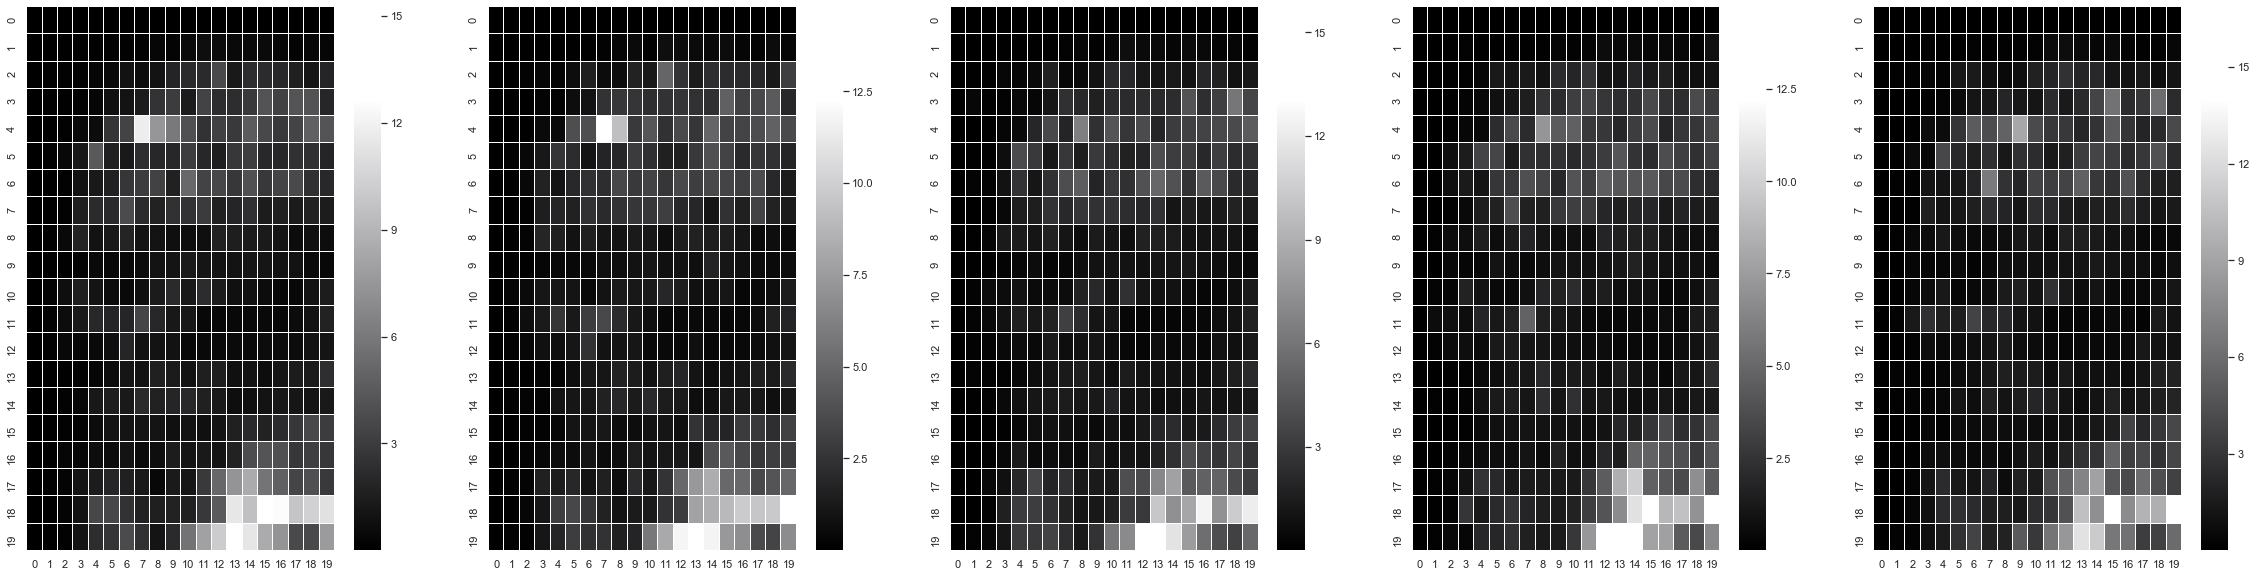

<Figure size 800x560 with 0 Axes>

<Figure size 800x560 with 0 Axes>

<Figure size 800x560 with 0 Axes>

<Figure size 800x560 with 0 Axes>

<Figure size 800x560 with 0 Axes>

In [12]:
# different windows sizes for sentiment score b
#h = 24
s_days = 20 # short
l_days = 20 # long

f, axes = plt.subplots(1, 5, figsize=(40,10))
win_all_a = np.zeros(shape=(s_days,l_days))
# matrix of size (s_days,l_days)
for std in range(0,5):
    for i in range(0, s_days):
        for j in range(0, l_days):
            sent_score_a = ah.nb_calc_sentiment_score_a(aug_signal_a,aug_signal_b,(i+1)*24+np.random.normal(0,std),(j+1)*24+np.random.normal(0,std))
            win_all_a[i,j] = ah.nb_backtest_a(price_data, sent_score_a, 1.0, 0.0075)[-1]
    cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.0, dark=1.2, as_cmap=True)
    figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
    ax = sns.heatmap(win_all_a, linewidth=0.01, cmap=cmap,ax=axes[std])
plt.show()


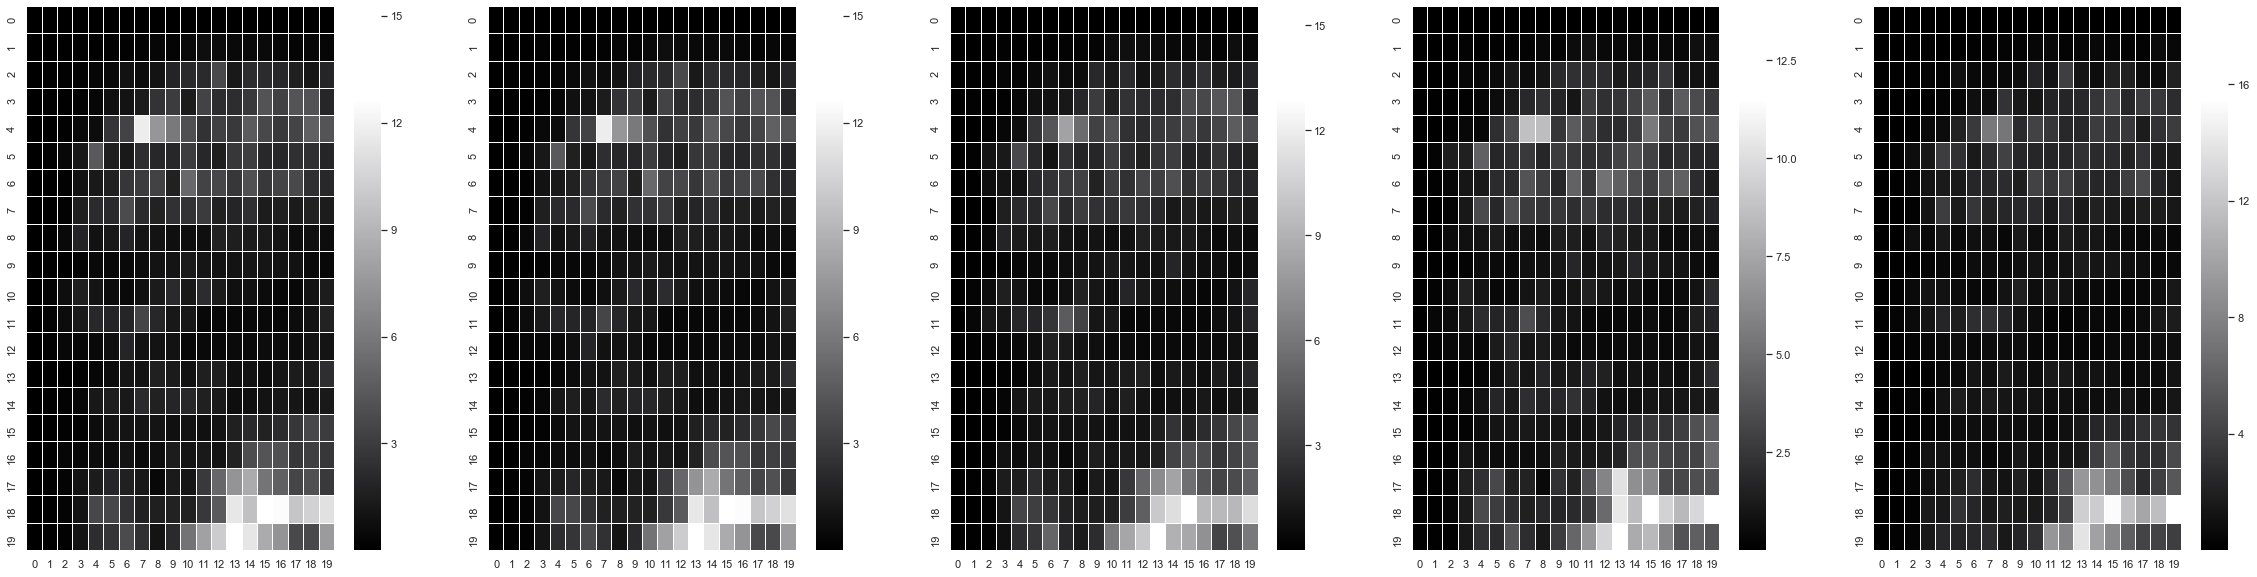

<Figure size 800x560 with 0 Axes>

<Figure size 800x560 with 0 Axes>

<Figure size 800x560 with 0 Axes>

<Figure size 800x560 with 0 Axes>

<Figure size 800x560 with 0 Axes>

In [13]:
# different windows sizes for sentiment score b
#h = 24
s_days = 20 # short
l_days = 20 # long

f, axes = plt.subplots(1, 5, figsize=(40,10))
win_all_a = np.zeros(shape=(s_days,l_days))
# matrix of size (s_days,l_days)
for std in range(0,5):
    for i in range(0, s_days):
        for j in range(0, l_days):
            sent_score_a = ah.nb_calc_sentiment_score_a(aug_signal_a,aug_signal_b,(i+1)*24+np.random.uniform(0,std),(j+1)*24+np.random.uniform(0,std))
            win_all_a[i,j] = ah.nb_backtest_a(price_data, sent_score_a, 1.0, 0.0075)[-1]
    cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.0, dark=1.2, as_cmap=True)
    figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
    ax = sns.heatmap(win_all_a, linewidth=0.01, cmap=cmap,ax=axes[std])
plt.show()


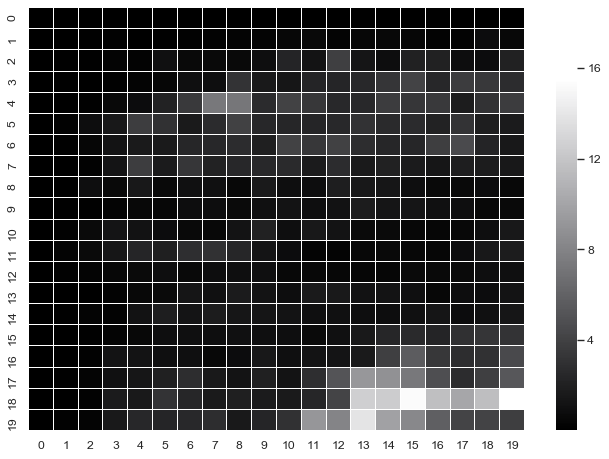

In [14]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.0, dark=1.2, as_cmap=True)
figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(win_all_a, linewidth=0.01, cmap=cmap)
plt.show()

In [15]:
# different windows sizes for sentiment score b
#h = 24
s_days = 20 # short
l_days = 20 # long

win_all_b = np.zeros(shape=(s_days,l_days))

# matrix of size (s_days,l_days)

for i in range(0, s_days):
    for j in range(0, l_days):
        sent_score_a = ah.nb_calc_sentiment_score_a(aug_signal_a,aug_signal_b,(i+1)*24+np.random.normal(0,1),(j+1)*24+np.random.normal(0,1))
        win_all_b[i,j] = ah.nb_backtest_a(price_data, sent_score_a, 1.0, 0.0075)[-1]


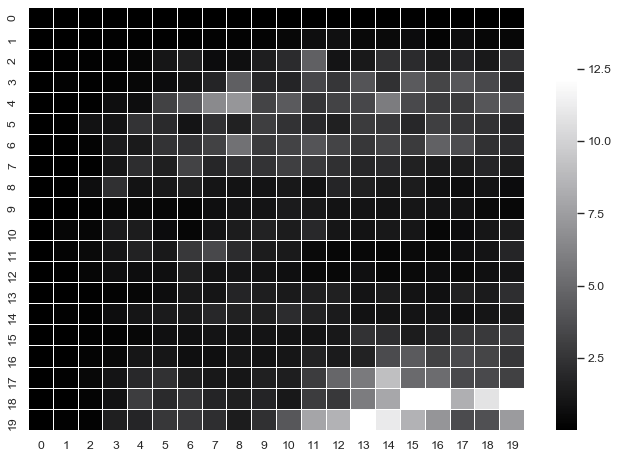

In [16]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.0, dark=1.2, as_cmap=True)
figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(win_all_b, linewidth=0.01, cmap=cmap)
plt.show()